In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import signal
%pylab inline
import scipy.io.wavfile as wav

# input arguments
path_to_external_audio = "outside.wav"
path_to_internal_audio = "inside.wav"

Populating the interactive namespace from numpy and matplotlib


In [34]:
# reads the .wav file and converts to an array
def read_file(fname):
    fn = wav.read(fname)
    sampling_rate = fn[0]
    data = fn[1]
    left = []
    for frame in data:
        left.append(frame[0])
    return left, sampling_rate

# converts seconds to units of sampling frequency
def s(time):
    return int(sampling_rate * time)
    # sampling_rate is 44100 Hz for the files we are using

# converts units of sampling frequency to seconds
def t(index):
    return index / sampling_rate
    # sampling_rate is 44100 Hz for the files we are using

# a 'zero' filter that eliminates values less than frac * peak value
def z_filter(x, frac):
    peak = max(x)
    to_return = []
    for element in x:
        if element > (peak * frac):
            to_return.append(element / peak)
        else:
            to_return.append(0)
    return to_return

# a 'range' filter that eliminates values except those between indices 'start' and 'end'
def r_filter(x, start, end):
    to_return, counter = [], 0
    while counter < len(x):
        if counter > start and counter < end:
            to_return.append(x[counter])
        else:
            to_return.append(0)
        counter += 1
    return to_return

# a moving average function
def moving_average(a, n):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

# a function that finds the index of the final peak
def find_last_peak(audio):
    reverse, index = audio[::-1], 0
    while index < len(reverse):
        if reverse[index] > 0:
            break
        index += 1
    return len(audio) - (index + 1)

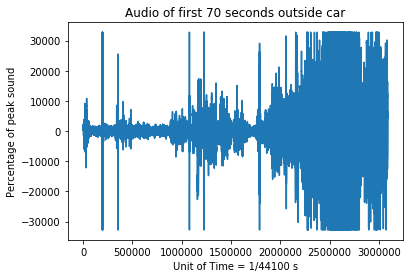

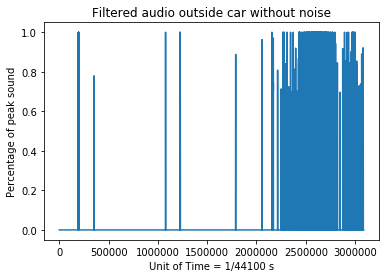

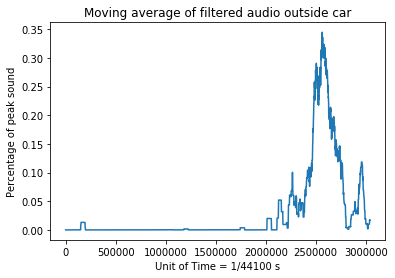

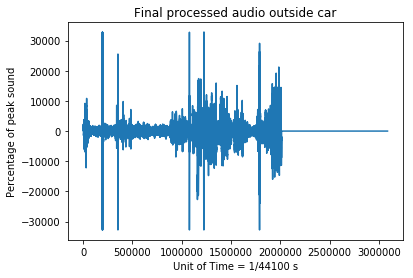

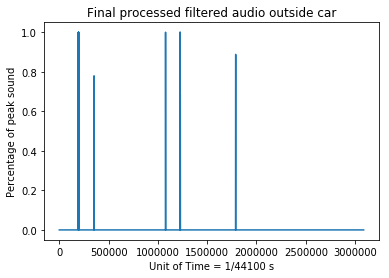

In [35]:
# Below is the audio of the car from the outside. 
left, sampling_rate = read_file(path_to_external_audio)
left_copy, car_start = left[s(0):s(70)], False
z_filtered = z_filter(left_copy, 2/3)
data, index = moving_average(z_filtered, 44100), 0

plt.plot(left[s(0):s(70)])
plt.xlabel('Unit of Time = 1/44100 s')
plt.ylabel('Percentage of peak sound')
plt.title('Audio of first 70 seconds outside car')
plt.show() 

plt.plot(z_filtered)
plt.xlabel('Unit of Time = 1/44100 s')
plt.ylabel('Percentage of peak sound')
plt.title('Filtered audio outside car without noise')
plt.show()   

plt.plot(data)
plt.xlabel('Unit of Time = 1/44100 s')
plt.ylabel('Percentage of peak sound')
plt.title('Moving average of filtered audio outside car')
plt.show()   

# clearing out all values past a certain threshold of moving average
while index < len(left_copy):
    if car_start:
        left_copy[index] = 0
    elif data[index] > 0.02:
        left_copy[index] = 0
        car_start = True
    index += 1

plt.plot(left_copy)
plt.xlabel('Unit of Time = 1/44100 s')
plt.ylabel('Percentage of peak sound')
plt.title('Final processed audio outside car')
plt.show()

final_left = z_filter(left_copy, 2/3)
plt.plot(final_left)
plt.xlabel('Unit of Time = 1/44100 s')
plt.ylabel('Percentage of peak sound')
plt.title('Final processed filtered audio outside car')
plt.show()

# The last peak on the final graph represents the door closing.
outside_peak = t(find_last_peak(final_left))

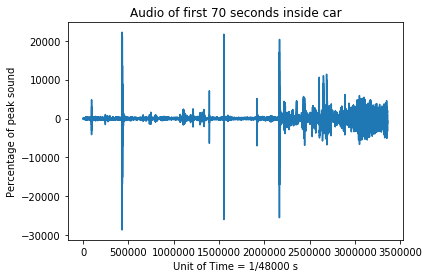

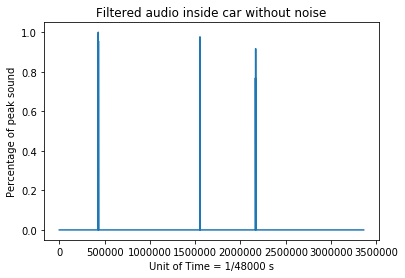

In [36]:
# Below is the audio of the car from the inside. 
right, sampling_rate = read_file(path_to_internal_audio)
right_copy, car_start = right[s(0):s(70)], False
z_filtered = z_filter(right_copy, 2/3)

# The audio inside the car is more muffled, so we don't need the moving averages.
# data, index = moving_average(z_filtered, 44100), 0

plt.plot(right[s(0):s(70)])
plt.xlabel('Unit of Time = 1/48000 s')
plt.ylabel('Percentage of peak sound')
plt.title('Audio of first 70 seconds inside car')
plt.show() 

final_right = z_filtered
plt.plot(final_right)
plt.xlabel('Unit of Time = 1/48000 s')
plt.ylabel('Percentage of peak sound')
plt.title('Filtered audio inside car without noise')
plt.show()

# The last peak on the final graph represents the door closing.
inside_peak = t(find_last_peak(final_right))

In [38]:
print("The last peak of external audio is at " + str(outside_peak) + " seconds.")
print("The last peak of internal audio is at " + str(inside_peak) + " seconds.\n")
print("The difference is " + str(inside_peak - outside_peak) + " seconds.")

The last peak of external audio is at 40.57206349206349 seconds.
The last peak of internal audio is at 45.160895833333335 seconds.

The difference is 4.588832341269843 seconds.
